<a href="https://www.kaggle.com/code/ellecoding/house-prices-prediction-model?scriptVersionId=164271860" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Prices Prediction Model
In this project I will use a Random Forest Model with variables that have an association of 0.6 or higher to the target variable in order to predict house prices. 

First, I'll do a quick EDA to analyze the variables and choose the best associated with SalePrice to create the training dataset. Let's get started!

In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [53]:
# Load data
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [54]:
# Preview data
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Target Variable
First, let's look into SalePrice, the target variable the model will predict.

In [55]:
# Descriptive statistics summary of 'SalePrice'
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/tmp/ipykernel_43/457920118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice']);


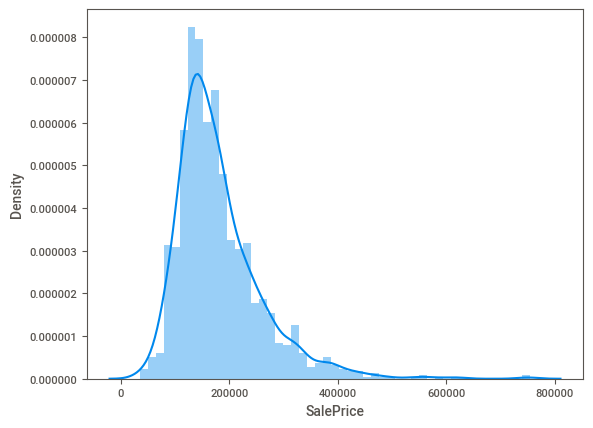

In [56]:
# Histogram of 'SalePrice'
sns.distplot(train['SalePrice']);

With the histogram, we see that SalePrice:
* Deviates from normal distribution
* Has positive skewness
* Shows peakedness

Now let's look into the other variables and their association with SalePrice.

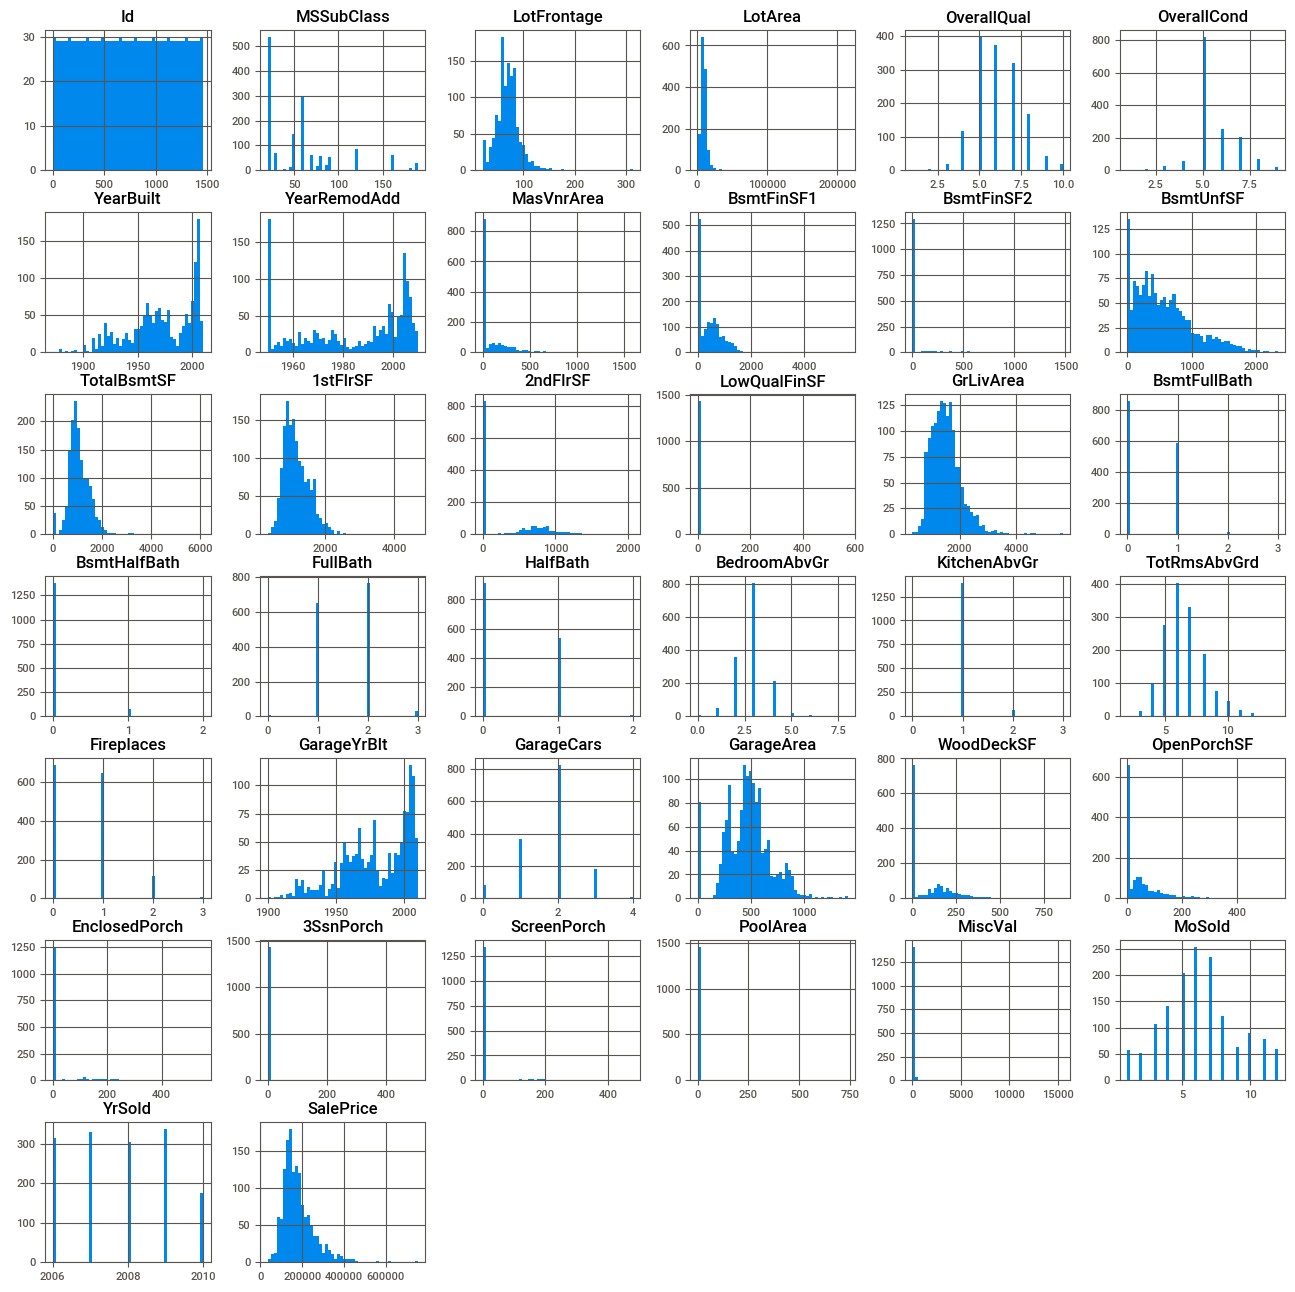

In [57]:
# 'Train' chart overview 
train.hist(bins=50, figsize=(16,16))
plt.show()

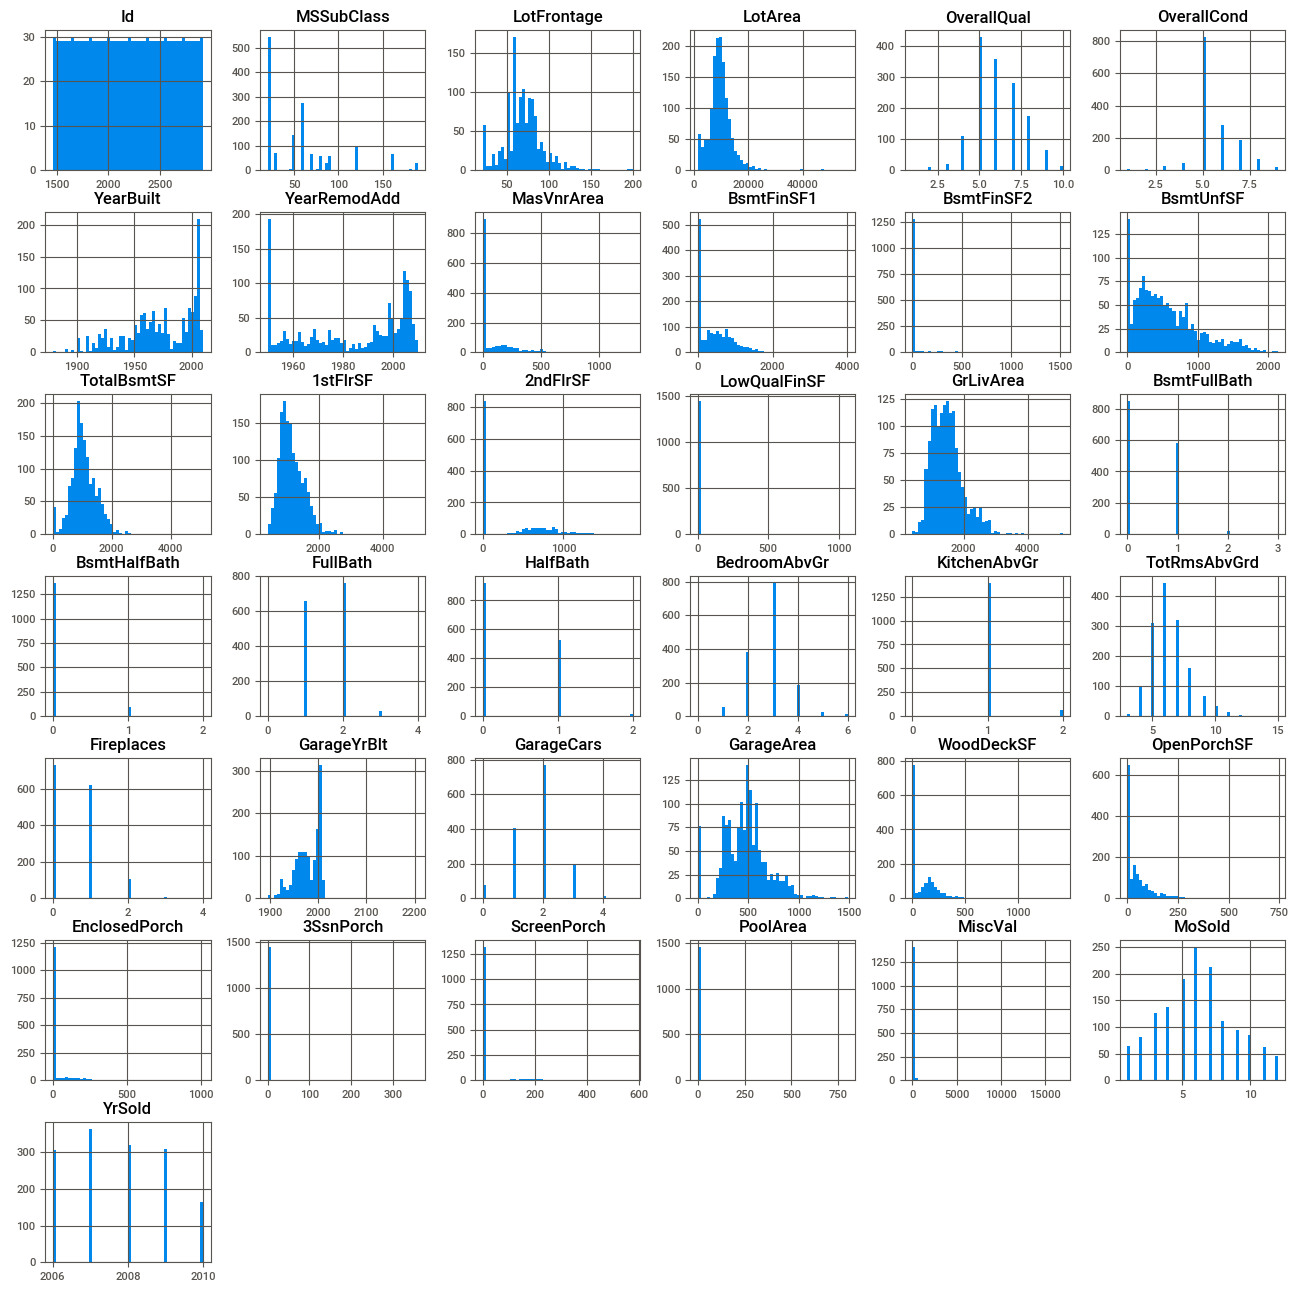

In [58]:
# 'Test' chart overview 
test.hist(bins=50, figsize=(16,16))
plt.show()

## Other Variables
Now let's look into the other columns. To make this process quicker, I will use the library sweetviz to make a report on all columns so I can easily see their association with SalePrice.

In [59]:
# Install library
!pip install sweetviz

In [60]:
# Full report on all variables
import sweetviz as sv
report = sv.analyze(train)
report.show_html("overview_report.html") # Download the html to view the full report (screenshot below)

                                             |          | [  0%]   00:00 -> (? left)

Report overview_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


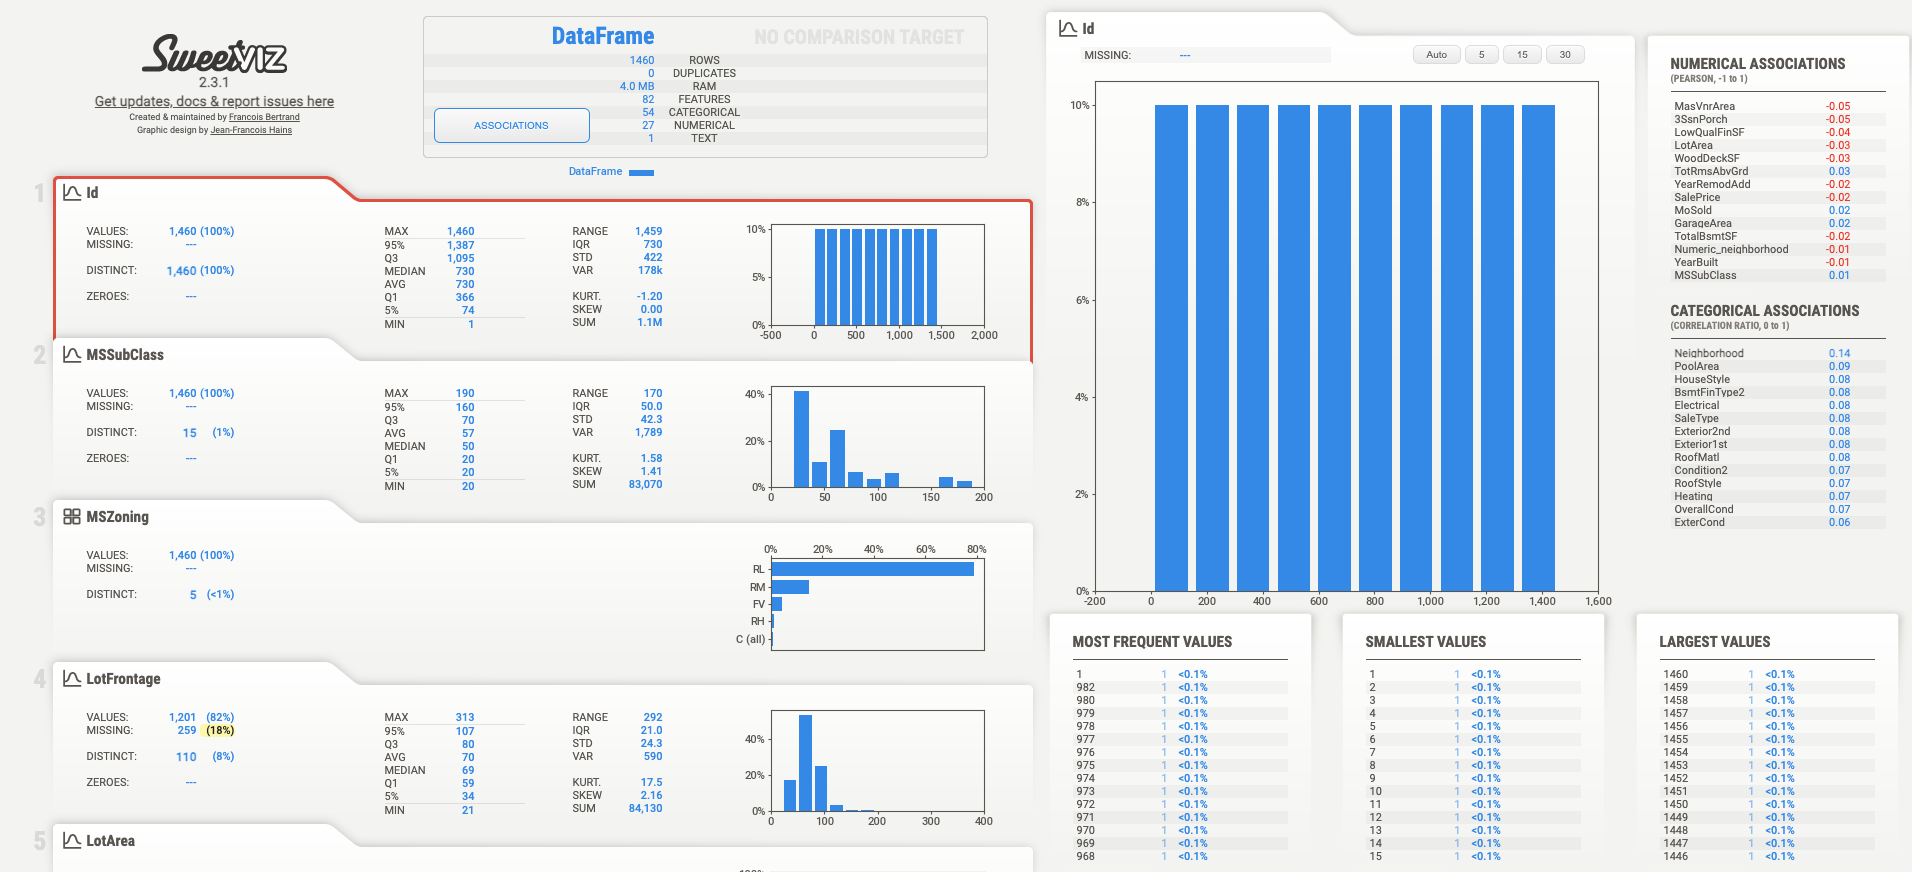

# Training Dataset
After analyzing the full report, I have selected 10 variables with an association to SalePrice of 0.6 and above for the first training model. I will later try with associations of 0.5 and higher, and with 0.4 and higher to compare the results. 

Now we move onto the next stage of creating the new datasets with these variables and transforming the necesary data types.

## Dataset with an association of 0.6 or more

In [61]:
# Select columns for first training dataset with 0.6 association to SalePrice or more
selected_columns = ['Neighborhood', 'OverallQual', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'KitchenQual', 'GarageCars', 'GarageArea', 'SalePrice']

train_ds = train[selected_columns]

In [62]:
# Display the first 10 rows of x_train_1
train_ds.head(10)

,Neighborhood,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,SalePrice
0,CollgCr,7,Gd,Gd,856,856,1710,Gd,2,548,208500
1,Veenker,6,TA,Gd,1262,1262,1262,TA,2,460,181500
2,CollgCr,7,Gd,Gd,920,920,1786,Gd,2,608,223500
3,Crawfor,7,TA,TA,756,961,1717,Gd,3,642,140000
4,NoRidge,8,Gd,Gd,1145,1145,2198,Gd,3,836,250000
5,Mitchel,5,TA,Gd,796,796,1362,TA,2,480,143000
6,Somerst,8,Gd,Ex,1686,1694,1694,Gd,2,636,307000
7,NWAmes,7,TA,Gd,1107,1107,2090,TA,2,484,200000
8,OldTown,7,TA,TA,952,1022,1774,TA,2,468,129900
9,BrkSide,5,TA,TA,991,1077,1077,TA,1,205,118000


## Prepare training dataset
Now it's time for label mapping and one-hot encoding to transform the categorical data types for our model.

In [63]:
# Map variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1
exterQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}

train_ds.loc[:, 'ExterQual'] = train_ds['ExterQual'].map(exterQual_mapping)
train_ds.head()

,Neighborhood,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,SalePrice
0,CollgCr,7,4,Gd,856,856,1710,Gd,2,548,208500
1,Veenker,6,3,Gd,1262,1262,1262,TA,2,460,181500
2,CollgCr,7,4,Gd,920,920,1786,Gd,2,608,223500
3,Crawfor,7,3,TA,756,961,1717,Gd,3,642,140000
4,NoRidge,8,4,Gd,1145,1145,2198,Gd,3,836,250000


In [64]:
# Map variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1 NA -> 0
BsmtQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1,
    'NA' : 0
}

train_ds.loc[:, 'BsmtQual'] = train_ds['BsmtQual'].map(BsmtQual_mapping)


In [65]:
# Map variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1
KitchenQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}

train_ds.loc[:, 'KitchenQual'] = train_ds['KitchenQual'].map(KitchenQual_mapping)
train_ds.head()

,Neighborhood,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,SalePrice
0,CollgCr,7,4,4.0,856,856,1710,4,2,548,208500
1,Veenker,6,3,4.0,1262,1262,1262,3,2,460,181500
2,CollgCr,7,4,4.0,920,920,1786,4,2,608,223500
3,Crawfor,7,3,3.0,756,961,1717,4,3,642,140000
4,NoRidge,8,4,4.0,1145,1145,2198,4,3,836,250000


In [66]:
# One-hot encoding for Neighborhood column
train_ds = pd.get_dummies(train_ds, columns=['Neighborhood'], prefix=['nom'])

# Only select boolean columns
bool_columns = train_ds.select_dtypes(include=bool).columns

# Convert to binary code
train_ds[bool_columns] = train_ds[bool_columns].astype(int)

train_ds.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,SalePrice,...,nom_NoRidge,nom_NridgHt,nom_OldTown,nom_SWISU,nom_Sawyer,nom_SawyerW,nom_Somerst,nom_StoneBr,nom_Timber,nom_Veenker
0,7,4,4.0,856,856,1710,4,2,548,208500,...,0,0,0,0,0,0,0,0,0,0
1,6,3,4.0,1262,1262,1262,3,2,460,181500,...,0,0,0,0,0,0,0,0,0,1
2,7,4,4.0,920,920,1786,4,2,608,223500,...,0,0,0,0,0,0,0,0,0,0
3,7,3,3.0,756,961,1717,4,3,642,140000,...,0,0,0,0,0,0,0,0,0,0
4,8,4,4.0,1145,1145,2198,4,3,836,250000,...,1,0,0,0,0,0,0,0,0,0


In [67]:
# Replace nan values to 0
train_ds.fillna(0, inplace=True)

# Prediction Model

In [68]:
# Import library
import numpy as np

# Split dataset
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

split_train, split_test = split_dataset(train_ds)
print("{} examples in training, {} examples in testing.".format(
    len(split_train), len(split_test)))

1172 examples in training, 288 examples in testing.


In [69]:
test_output = split_test['SalePrice']

test_output.head()

1     181500
5     143000
6     307000
7     200000
14    157000
Name: SalePrice, dtype: int64

In [70]:
split_train.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,SalePrice,...,nom_NoRidge,nom_NridgHt,nom_OldTown,nom_SWISU,nom_Sawyer,nom_SawyerW,nom_Somerst,nom_StoneBr,nom_Timber,nom_Veenker
0,7,4,4.0,856,856,1710,4,2,548,208500,...,0,0,0,0,0,0,0,0,0,0
2,7,4,4.0,920,920,1786,4,2,608,223500,...,0,0,0,0,0,0,0,0,0,0
3,7,3,3.0,756,961,1717,4,3,642,140000,...,0,0,0,0,0,0,0,0,0,0
4,8,4,4.0,1145,1145,2198,4,3,836,250000,...,1,0,0,0,0,0,0,0,0,0
8,7,3,3.0,952,1022,1774,3,2,468,129900,...,0,0,1,0,0,0,0,0,0,0


In [71]:
# Select 'SalePrice' as the output
output = train['SalePrice']
print(output)

# Remove null values in Output
output.fillna(0, inplace=True)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [72]:
print(output)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [73]:
import tensorflow_decision_forests as tfdf

label = "SalePrice"

# Convert to TensorFlow Dataset
train_data_tfdf = tfdf.keras.pd_dataframe_to_tf_dataset(split_train,label=label, task=tfdf.keras.Task.REGRESSION)
test_data_tfdf = tfdf.keras.pd_dataframe_to_tf_dataset(split_test,label=None, task=tfdf.keras.Task.REGRESSION)

## Create and Train Model

In [74]:
# Create Random Forest Model
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

# Include eval metrics
rf.compile(metrics=["mse"])

Use /tmp/tmp1mdadjto as temporary training directory


In [75]:
rf.fit(x=train_data_tfdf)

Reading training dataset...
Training dataset read in 0:00:00.652807. Found 1172 examples.
Training model...


[INFO 24-02-25 16:32:25.1528 UTC kernel.cc:1243] Loading model from path /tmp/tmp1mdadjto/model/ with prefix 316c1fc9c7ff4c84


Model trained in 0:00:01.491812
Compiling model...


[INFO 24-02-25 16:32:25.6130 UTC decision_forest.cc:660] Model loaded with 300 root(s), 109800 node(s), and 33 input feature(s).
[INFO 24-02-25 16:32:25.6130 UTC abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 24-02-25 16:32:25.6131 UTC kernel.cc:1075] Use fast generic engine


Model compiled.


## Plot and Visualize Model

In [76]:
# Plot Model
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

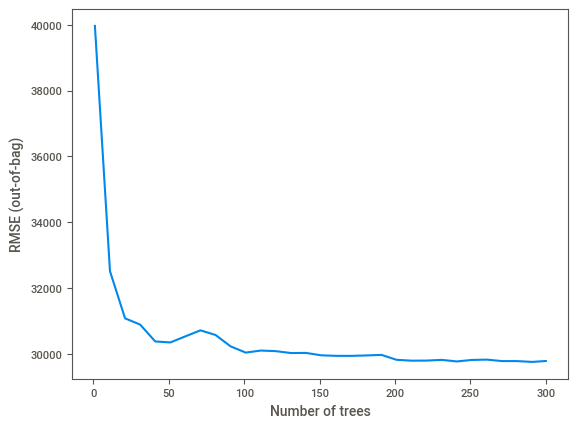

In [77]:
# Visualize Model
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

## Inspect and Evaluate Model

In [78]:
# Inspect Model
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1172, accuracy=None, loss=None, rmse=29783.43042168056, ndcg=None, aucs=None, auuc=None, qini=None)

In [79]:
# Evaluate Model using validation dataset
evaluation = rf.evaluate(x=test_data_tfdf,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 485ms/step - loss: 0.0000e+00 - mse: 0.0000e+00
loss: 0.0000
mse: 0.0000


In [80]:
# Check model predictions contributions
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_NODES
	 SUM_SCORE
	 NUM_AS_ROOT
	 INV_MEAN_MIN_DEPTH


In [81]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #7), 112.0),
 ("ExterQual" (1; #2), 60.0),
 ("GarageCars" (1; #4), 49.0),
 ("GrLivArea" (1; #5), 30.0),
 ("BsmtQual" (1; #1), 16.0),
 ("KitchenQual" (1; #6), 12.0),
 ("GarageArea" (1; #3), 9.0),
 ("TotalBsmtSF" (1; #8), 7.0),
 ("1stFlrSF" (1; #0), 4.0),
 ("nom_NoRidge" (1; #25), 1.0)]

In [82]:
# Predict
predictions = rf.predict(test_data_tfdf)

1/1 [==============================] - 0s 80ms/step


In [83]:
# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_output, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1580125433.999666


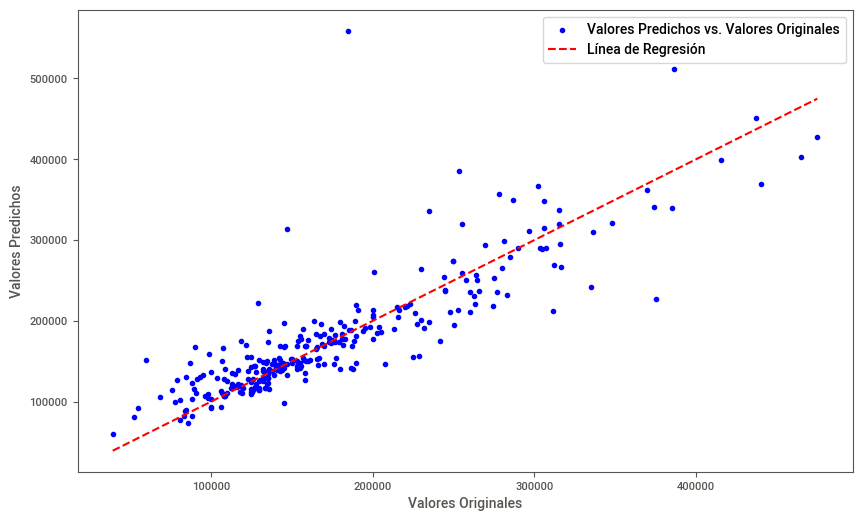

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Graph prediction
plt.figure(figsize=(10, 6))
plt.scatter(test_output, predictions, color='blue', label='Valores Predichos vs. Valores Originales')
plt.plot([min(test_output), max(test_output)], [min(test_output), max(test_output)], linestyle='--', color='red', label='Línea de Regresión')
plt.xlabel('Valores Originales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()

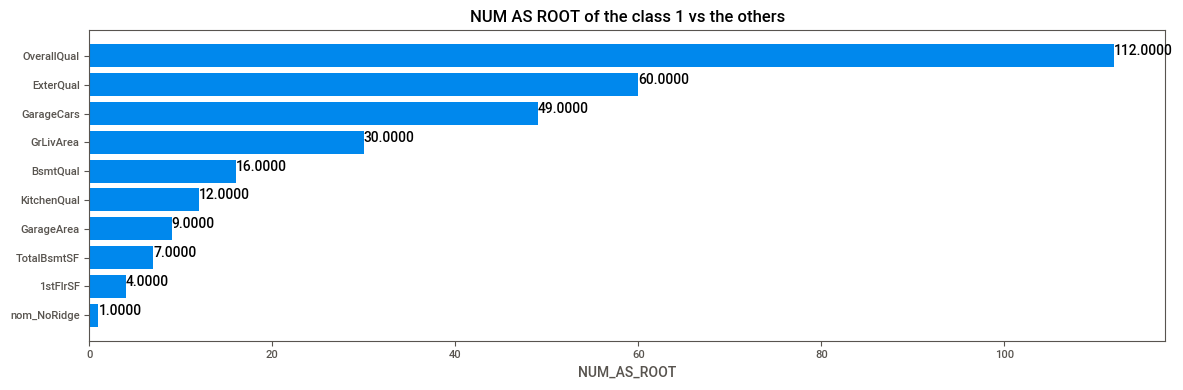

In [85]:
# Plot variable importance
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values
# `variable_importances` is a list of <feature, importance> tuples
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]

# Order in decreasing importance value
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# Label bars with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

# Test Dataset
Now, let's prepare the test dataset and run it through the model.

In [86]:
# Select columns for test dataset
selected_columns = ['Neighborhood', 'OverallQual', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'KitchenQual', 'GarageCars', 'GarageArea']

test_ds = test[selected_columns]

In [87]:
# Display the first 10 rows of x_train_1
test_ds.head(10)

,Neighborhood,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea
0,NAmes,5,TA,TA,882.0,896,896,TA,1.0,730.0
1,NAmes,6,TA,TA,1329.0,1329,1329,Gd,1.0,312.0
2,Gilbert,5,TA,Gd,928.0,928,1629,TA,2.0,482.0
3,Gilbert,6,TA,TA,926.0,926,1604,Gd,2.0,470.0
4,StoneBr,8,Gd,Gd,1280.0,1280,1280,Gd,2.0,506.0
5,Gilbert,6,TA,Gd,763.0,763,1655,TA,2.0,440.0
6,Gilbert,6,TA,Gd,1168.0,1187,1187,TA,2.0,420.0
7,Gilbert,6,TA,Gd,789.0,789,1465,TA,2.0,393.0
8,Gilbert,7,TA,Gd,1300.0,1341,1341,Gd,2.0,506.0
9,NAmes,4,TA,TA,882.0,882,882,TA,2.0,525.0


In [88]:
# Map variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1
exterQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}

test_ds.loc[:, 'ExterQual'] = test_ds['ExterQual'].map(exterQual_mapping)
test_ds.head()

,Neighborhood,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea
0,NAmes,5,3,TA,882.0,896,896,TA,1.0,730.0
1,NAmes,6,3,TA,1329.0,1329,1329,Gd,1.0,312.0
2,Gilbert,5,3,Gd,928.0,928,1629,TA,2.0,482.0
3,Gilbert,6,3,TA,926.0,926,1604,Gd,2.0,470.0
4,StoneBr,8,4,Gd,1280.0,1280,1280,Gd,2.0,506.0


In [89]:
# Map variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1 NA -> 0
BsmtQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1,
    'NA' : 0
}

test_ds.loc[:, 'BsmtQual'] = test_ds['BsmtQual'].map(BsmtQual_mapping)
test_ds.head()

,Neighborhood,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea
0,NAmes,5,3,3.0,882.0,896,896,TA,1.0,730.0
1,NAmes,6,3,3.0,1329.0,1329,1329,Gd,1.0,312.0
2,Gilbert,5,3,4.0,928.0,928,1629,TA,2.0,482.0
3,Gilbert,6,3,3.0,926.0,926,1604,Gd,2.0,470.0
4,StoneBr,8,4,4.0,1280.0,1280,1280,Gd,2.0,506.0


In [90]:
# Map variables   Ex	5 Gd	4  TA	3 Fa	2 Po	1
KitchenQual_mapping = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1
}

test_ds.loc[:, 'KitchenQual'] = test_ds['KitchenQual'].map(KitchenQual_mapping)
test_ds.head()

,Neighborhood,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea
0,NAmes,5,3,3.0,882.0,896,896,3.0,1.0,730.0
1,NAmes,6,3,3.0,1329.0,1329,1329,4.0,1.0,312.0
2,Gilbert,5,3,4.0,928.0,928,1629,3.0,2.0,482.0
3,Gilbert,6,3,3.0,926.0,926,1604,4.0,2.0,470.0
4,StoneBr,8,4,4.0,1280.0,1280,1280,4.0,2.0,506.0


In [91]:
# One-hot encoding for Neighborhood column
test_ds = pd.get_dummies(test_ds, columns=['Neighborhood'], prefix=['nom'])

# Only select boolean columns
bool_columns = test_ds.select_dtypes(include=bool).columns

# Convert to binary code
test_ds[bool_columns] = test_ds[bool_columns].astype(int)

test_ds.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,nom_Blmngtn,...,nom_NoRidge,nom_NridgHt,nom_OldTown,nom_SWISU,nom_Sawyer,nom_SawyerW,nom_Somerst,nom_StoneBr,nom_Timber,nom_Veenker
0,5,3,3.0,882.0,896,896,3.0,1.0,730.0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,3,3.0,1329.0,1329,1329,4.0,1.0,312.0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,3,4.0,928.0,928,1629,3.0,2.0,482.0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,3,3.0,926.0,926,1604,4.0,2.0,470.0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,4,4.0,1280.0,1280,1280,4.0,2.0,506.0,0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
# Replace nan values to 0
test_ds.fillna(0, inplace=True)

In [93]:
# Check test dataset
test_ds.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,GarageCars,GarageArea,nom_Blmngtn,...,nom_NoRidge,nom_NridgHt,nom_OldTown,nom_SWISU,nom_Sawyer,nom_SawyerW,nom_Somerst,nom_StoneBr,nom_Timber,nom_Veenker
0,5,3,3.0,882.0,896,896,3.0,1.0,730.0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,3,3.0,1329.0,1329,1329,4.0,1.0,312.0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,3,4.0,928.0,928,1629,3.0,2.0,482.0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,3,3.0,926.0,926,1604,4.0,2.0,470.0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,4,4.0,1280.0,1280,1280,4.0,2.0,506.0,0,...,0,0,0,0,0,0,0,1,0,0


# Prediction Submission
Great! Let's run the test dataset through the model and see what we get.

In [95]:
import tensorflow as tf
import pandas as pd

# Load test dataset
ids = test.pop('Id')

# Create a TensorFlow Dataset
test_ds_tf = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds,task = tfdf.keras.Task.REGRESSION, label=None)

# Assuming rf is your trained model
# Make predictions
preds = rf.predict(test_ds_tf)

# Assuming ids is a list of identifiers corresponding to your test data
# Create output DataFrame
output = pd.DataFrame({'Id': ids, 'SalePrice': preds.squeeze()})

output.head()


2/2 [==============================] - 0s 18ms/step


,Id,SalePrice
0,1461,129703.625000
1,1462,158480.140625
2,1463,162913.296875
3,1464,177897.953125
4,1465,215439.750000
